In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians

In [2]:
def plot_TMA():
    TMA_lon=[12.4975, 13.1639, 13.3244, 13.3244, 13.2769, 13.1992, 12.6958, 11.7661, 11.5828, 11.1406, 11.4503, 12.2956,
         11.9975, 12.4975];


    TMA_lat=[58.7661, 58.7328, 58.5169, 58.2953, 58.0969, 57.7672, 57.2275, 56.9856, 57.2136, 57.7514, 58.1278, 58.6456,
         58.4653, 58.7661];

    rwy03_lon=[12.26771, 12.29193];
    rwy03_lat=[57.64952, 57.67615 ];
    
    KELIN_lon =    12.0542
    KELIN_lat =    58.2436
    LOBBI_lon =    11.4981
    LOBBI_lat =    57.3181
    MAKUR_lon =    11.4069
    MAKUR_lat =    57.4297
    MOXAM_lon =    13.3139
    MOXAM_lat =    58.5314
    NEGIL_lon =    12.6253
    NEGIL_lat =    58.2513
    RISMA_lon =    11.9792
    RISMA_lat =    57.0419
    ARQUS_lon =    12.9286
    ARQUS_lat =    57.0958
    
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = min(TMA_lat) + (max(TMA_lat)-min(TMA_lat))/2
    #print(central_latitude)
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy03_lon,rwy03_lat, color="red")
  
    plt.plot(KELIN_lon, KELIN_lat, 'ro')
    plt.plot(LOBBI_lon, LOBBI_lat, 'ro')
    plt.plot(MAKUR_lon, MAKUR_lat, 'ro')
    plt.plot(MOXAM_lon, MOXAM_lat, 'ro')
    plt.plot(NEGIL_lon, NEGIL_lat, 'ro')
    plt.plot(RISMA_lon, RISMA_lat, 'ro')
    plt.plot(ARQUS_lon, ARQUS_lat, 'ro')

In [3]:
 def plot_horizontal_profile(df, linewidth=1):
    
    plot_TMA()
    
    if df.empty:
        return
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        
        lons = flight_df["lon"]
        lats = flight_df["lat"]
        
        plt.plot(lons, lats, color='k', linewidth=linewidth)

In [4]:
def plot_vertical_profile(df, linewidth=1):
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['altitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

In [5]:
def plot_raw_vertical_profile(df, linewidth=1):
           
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['rawAltitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [6]:
filename = "../Data/ESGG/2020/osn_ESGG_states_TMA_2020/osn_arrival_ESGG_states_TMA_2020_02_week5.csv"
temp_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
temp_df.set_index(['flightId', 'sequence'], inplace = True)
#print(temp_df.head(1))

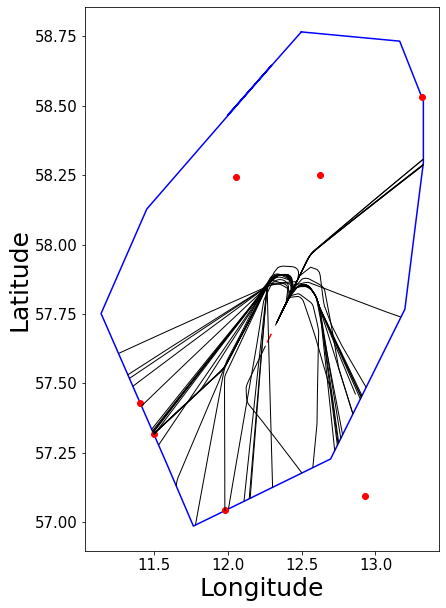

In [7]:
plot_horizontal_profile(temp_df)

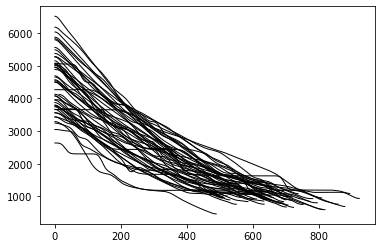

In [8]:
plot_vertical_profile(temp_df)

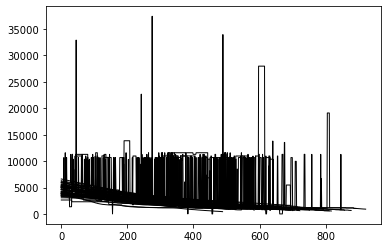

In [9]:
plot_raw_vertical_profile(temp_df)

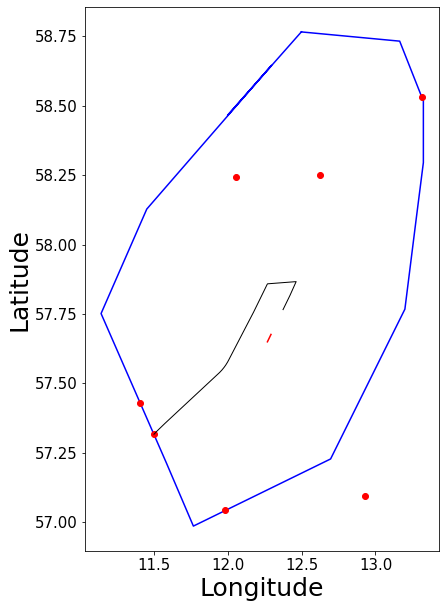

In [10]:
flight_df = temp_df[temp_df.index.get_level_values('flightId') == '200229AFR1552']
plot_horizontal_profile(flight_df)

In [11]:
def getPeriodFlightIds(df, timestamp_begin, timestamp_end):
    period_states_df = df[(df['timestamp'] >= timestamp_begin) & (df['timestamp'] <= timestamp_end)]
    
    flightIds = []
    
    for flight_id, new_df in period_states_df.groupby(level='flightId'):
        flightIds.append(flight_id)
        
    return flightIds

In [12]:
def getPeriodStatesDf(flightIds):
    
    period_states_df = pd.DataFrame(columns=['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'],
                              dtype=str)
    period_states_df.set_index(['flightId', 'sequence'], inplace = True)

    for flight_id in flightIds:
    
        flight_df = df.loc[df.index.get_level_values('flightId') == flight_id]
    
        period_states_df = period_states_df.append( flight_df )
        
    return period_states_df

In [13]:
(year1, month1, day1, hour_begin) = (2020, 2, 29, 0)
(year2, month2, day2, hour_end) = (2020, 3, 1, 0)

DATE_TIME_BEGIN = datetime(int(year1), int(month1), int(day1), hour_begin, 0, 0, 0, timezone.utc)
DATE_TIME_END = datetime(int(year1), int(month2), int(day2), hour_end, 0, 0, 0, timezone.utc)

timestamp_begin = int(DATE_TIME_BEGIN.timestamp())   #float -> int
timestamp_end = int(DATE_TIME_END.timestamp())

df = temp_df

flightIds = getPeriodFlightIds(df, timestamp_begin, timestamp_end)

period_df = getPeriodStatesDf(flightIds)

print(len(period_df.index.get_level_values('flightId').unique()))

#period_df.to_csv("states_" + str(year) + "_" + str(month) + "_" + str(day1) +  ".csv",
#                      sep=' ', encoding='utf-8', float_format='%.3f', header=False, index=True)

49


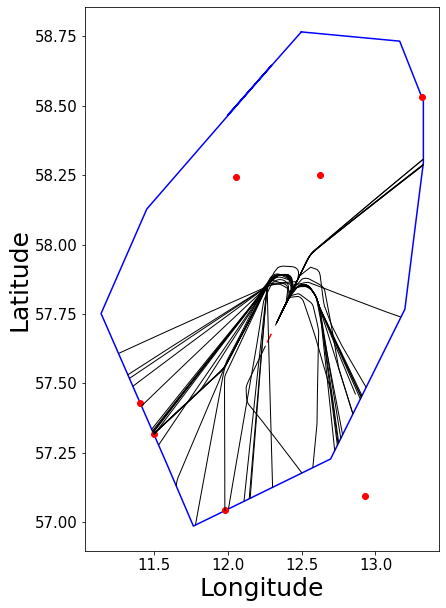

In [14]:
plot_horizontal_profile(period_df)

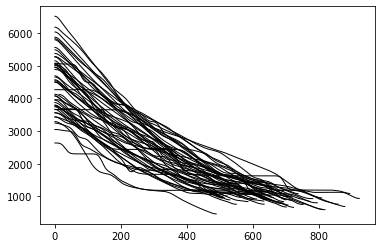

In [15]:
plot_vertical_profile(period_df)